In [9]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
pwd

'/Users/hyakuzukamaya/Desktop/lab/judgement_system/script/analyze'

In [3]:
!conda list | grep tensorflow

tensorflow                2.10.0          eigen_py39h2f7e057_0  
tensorflow-base           2.10.0          eigen_py39h61e1807_0  
tensorflow-estimator      2.10.0           py39hecd8cb5_0  


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import pickle
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np
from sklearn.preprocessing import Normalizer

## Loading a dataset

## Split into train data and test data as dataset
- データセットとして使用するデータを取得する。
- trainデータとtestデータに分割する。（例えば80%をtrainデータに、20%をtestデータに、など。）
- 書き方はデータセットとして使用するデータの type による。もし、numpy の形で持っているならhttps://www.tensorflow.org/tutorials/load_data/numpy?hl=ja が参考になります。

In [3]:


# x_path = '../../data/npy/x_random_l1_6.npy'
x_path = '../../data/npy/x_random_l1_6_dv.npy'
# x_path = '../../data/npy/x_random_6_diffseq_mean_l1.npy'
# x_path = '../../data/npy/x_random_6_diffseq_mean_l1_3.npy'
x_data = np.load(x_path)

# y_path = '../../data/npy/y_random_l1_6.npy'
y_path = '../../data/npy/y_random_l1_6_dv.npy'
# y_path = '../../data/npy/y_random_6_diffseq_mean_l1.npy'
# y_path = '../../data/npy/y_random_6_diffseq_mean_l1_3.npy'
y_data = np.load(y_path, allow_pickle=True)



print(len(y_data))

# min_val = y_data.min()
# max_val = y_data.max()

# y_data = (y_data - min_val)/(max_val - min_val)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

1222
(977, 16)
(245, 16)
(977,)
(245,)


## Set my model
- input_shape は入力データのサイズ。
- モデルの定義方法は調べればたくさん出てきますが、例えばここ： https://sinyblog.com/deaplearning/keras_how_to/ 
- 最後の層の出力は、期待する出力データのサイズ
- [model](https://github.com/si-tm/docs-l10n/blob/master/site/ja/tutorials/quickstart/beginner.py)

In [4]:
def build_model():
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'), # units=128 : 出力空間の次元数
    tf.keras.layers.Dropout(0.2), # 入力にドロップアウトを適用する rate=0.2 : 入力ユニットをドロップする割合
    tf.keras.layers.Dense(1) 
    ])

    optimizer = tf.keras.optimizers.Adam() # optimizers も Adam 以外に色々種類があります。調べてみてください！

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) # loss 関数に何を採用するかはどんな問題を解きたいのかによります。
                                        #ここでは MSE を採用していますが、他にも色々な選択肢があります。調べてみてください！
    return model

In [5]:
model = build_model()

2023-02-15 09:56:21.595585: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
example_batch = x_train[:10]
print(example_batch.shape)
example_result = model.predict(example_batch)
# example_result

(10, 16)
1/1 [==============================] - 1s 934ms/step


In [8]:
print(example_result)

[[ 0.07375738]
 [ 0.17876993]
 [ 0.05175596]
 [ 0.38807946]
 [ 0.22883315]
 [-0.10833241]
 [ 0.08243734]
 [ 0.10892184]
 [ 0.06917176]
 [ 0.20822355]]


In [9]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 400 # epoch 数も考慮しよう
# EPOCHS = 100 # epoch 数も考慮しよう

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
395,0.473575,0.523474,0.473575,0.085423,0.228435,0.085423,395
396,0.481487,0.524317,0.481487,0.072448,0.209693,0.072448,396
397,0.440775,0.508826,0.440775,0.081727,0.218811,0.081727,397
398,0.501368,0.549123,0.501368,0.094488,0.239673,0.094488,398
399,0.495565,0.545549,0.495565,0.128051,0.279840,0.128051,399


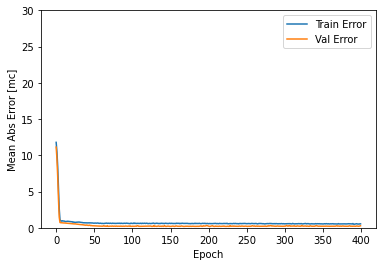

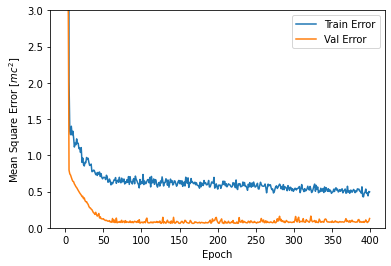

In [11]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [mc]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,30])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$mc^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,3])
    plt.legend()
    plt.show()


plot_history(history)

8/8 [==============================] - 0s 6ms/step


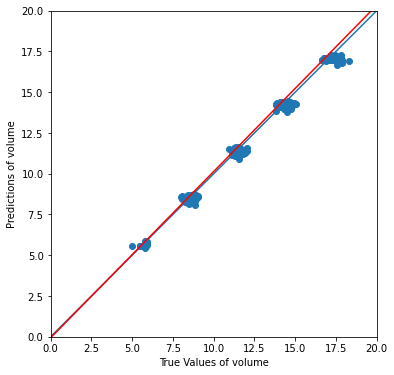

In [13]:
test_predictions = model.predict(x_test).flatten()
res = linregress(test_predictions, y_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, test_predictions)
# plt.xlabel('True Values [mc]')
# plt.ylabel('Predictions [mc]')
plt.xlabel('True Values of volume')
plt.ylabel('Predictions of volume')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,20])
plt.ylim([0,20])
_ = plt.plot([0,20], [0,20])

plt.plot([0,20], res.intercept + res.slope*np.array([0, 20]), 'r', label='fitted line')

# normalizer 学習前

In [14]:
# トレーニングした model をどこかで使用したいなら以下のようにモデルを保存する
model.save('../saved_model/random_l1_6_dev_model')

INFO:tensorflow:Assets written to: ../saved_model/random_l1_6_dev_model/assets


In [15]:
mse = tf.keras.losses.MeanSquaredError()

In [16]:
mse(y_test,test_predictions).numpy()

0.13129348

In [ ]:
test_predictions.rank